# Pandas 1 - Trabalhando com DataFrames

<br>
<img src="img/pandas_dataframe.png">
<br>

O que são os DataFrames do Pandas?

Antes de começar, vamos fazer uma breve recapitulação do que são os DataFrames.

DataFrames são uma maneira de armazenar dados em grades tabelas que podem ser facilmente visualizadas. Cada linha dessas grades corresponde a medidas ou valores de uma instância (observação), enquanto cada coluna é um vetor que contém dados para uma variável específica. Isso significa que as linhas de um frame de dados não precisam conter, mas podem conter o mesmo tipo de valores: elas podem ser numéricas, de caracteres, lógicas, etc.

Agora, os DataFrames em Python são muito semelhantes: eles vêm com a biblioteca Pandas e são definidos como estruturas de dados bidimensionais rotuladas com colunas de tipos potencialmente diferentes.

Em geral, você poderia dizer que o Pandas DataFrame consiste em três componentes principais: os dados, o índice e as colunas.

Em primeiro lugar, o DataFrame pode conter dados que são:

- um DataFrame Pandas
- uma série Pandas: um array rotulado unidimensional capaz de conter qualquer tipo de dados com rótulos ou índices de eixo. Um exemplo de um objeto de série é uma coluna de um DataFrame.
- um ndarray NumPy, que pode ser um registro ou estruturado
- um ndarray bidimensional
- dicionários de ndarray, listas, dicionários ou séries unidimensionais.

# Conhecendo DataFrames

Vamos criar o primeiro DataFrame a partir de uma *Series* e verificar a apresentação de uma tabela

### Importando as bibliotecas

In [36]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Definindo uma Series em Pandas

In [37]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [38]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [39]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [41]:
data[1]

0.5

In [40]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Indexação

In [42]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [43]:
data['b']

0.5

# Criando um DataFrame a partir de duas Series

<br>
<img src="img/dataframe_basico.png">
<br>

Agora vamos trabalhar com dados reais através da criação de *Series* em **Pandas** que darão origem a um DataFrame. Com isso, vamos realizar operações básicas de separação de dados e criação de uma coluna.

### Criando uma Series population a partir de um dicionário

In [47]:
population_dict = {'California': 38332521,
                   'Florida': 19552860,
                   'Illinois': 12882135,
                   'New York': 19651127,  
                   'Texas': 26448193,}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [48]:
population['California']

38332521

In [49]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Criando uma Series area a partir de um dicionário

In [51]:
area_dict = {'California': 423967, 
             'Florida': 170312,
             'Illinois': 149995,
             'New York': 141297,
             'Texas': 695662}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

### Criando um DataFrame states com dados de 'population' e 'area'

In [52]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


### Identificando os tipos das variáveis

In [92]:
type(states)

pandas.core.frame.DataFrame

In [91]:
type(states["population"])

pandas.core.series.Series

In [88]:
type([states["population"]])

list

### Verificando as características do DataFrame

In [57]:
states.shape

(5, 2)

In [58]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, California to Texas
Data columns (total 2 columns):
population    5 non-null int64
area          5 non-null int64
dtypes: int64(2)
memory usage: 280.0+ bytes


In [53]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [55]:
states.columns

Index(['population', 'area'], dtype='object')

In [56]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### Criando uma coluna 'density' a partir da divisão da 'population' pela 'area'

In [167]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763
New York,19651127,141297,139.076746
Texas,26448193,695662,38.018740


### Ordenando os dados por estados mais populados, maiores e mais populosos

In [220]:
states.sort_values(['population'], ascending = True)

,population,area,density
Illinois,12882135,149995,85.883763
Florida,19552860,170312,114.806121
New York,19651127,141297,139.076746
Texas,26448193,695662,38.018740
California,38332521,423967,90.000000


In [221]:
states.sort_values(['area'], ascending = True)

,population,area,density
New York,19651127,141297,139.076746
Illinois,12882135,149995,85.883763
Florida,19552860,170312,114.806121
California,38332521,423967,90.000000
Texas,26448193,695662,38.018740


In [222]:
states.sort_values(['density'], ascending = True)

,population,area,density
Texas,26448193,695662,38.018740
Illinois,12882135,149995,85.883763
California,38332521,423967,90.000000
Florida,19552860,170312,114.806121
New York,19651127,141297,139.076746


### Selecionando dados

In [213]:
states['Florida':'Illinois']

,population,area,density
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [214]:
states[1:3]

,population,area,density
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [169]:
data_pop = (states['population'] > 19552860) & (states['area']>423967)
data_pop

California    False
Florida       False
Illinois      False
New York      False
Texas          True
dtype: bool

In [173]:
states[(states['population'] > 19552860) & (states['area']>423967)]

,population,area,density
Texas,26448193,695662,38.01874


In [211]:
states[['area','density']]

,area,density
California,423967,90.413926
Florida,170312,114.806121
Illinois,149995,85.883763
New York,141297,139.076746
Texas,695662,38.018740


In [208]:
states[states.density > 100]

,population,area,density
Florida,19552860,170312,114.806121
New York,19651127,141297,139.076746


In [209]:
states.loc[states.density > 100, ['population', 'density']]

,population,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [218]:
states.loc['California', 'density']

90.0

In [219]:
states.iloc[0, 2]

90.0

# Caso Real

<br>
<img src="img/caso_real.png">
<br>

Agora vamos ler e entender uma tabela de um caso real. O arquivo *UKRetail* traz um banco de dados real de vendas para verificação e análise dos valores como segue.

- Leitura dos dados e acesso por um DataFrame
- Identificação dos tipos de variáveis
- Descrição básica dos dados
- Seleção de dados
- Criação de uma coluna para o faturamento
- Tratamento dos valoes negativos contidos no faturamento
- Obtenção do total faturado por país com agrupamento (*Groupby*)
- Visualização dos dados de consumo para um cliente por histograma
- Visualização do consumo de um produto por histograma
- Tratamento de valores nulos

# Lendo e acessando dados de um arquivo real de vendas

In [83]:
sales = pd.DataFrame(pd.read_csv('data/UKretail.csv',encoding='latin'))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,United Kingdom


In [108]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,United Kingdom


In [109]:
sales.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
325142,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:49:59,2.10,12680.0,France
325143,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:49:59,4.15,12680.0,France
325144,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:49:59,4.15,12680.0,France


### Identificando os tipos de variáveis

In [99]:
type(sales)

pandas.core.frame.DataFrame

In [93]:
type(sales["CustomerID"])

pandas.core.series.Series

In [100]:
type([sales["CustomerID"]])

list

### Descrição básica dos dados

In [84]:
sales.shape

(325145, 8)

In [98]:
sales.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [85]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325145 entries, 0 to 325144
Data columns (total 8 columns):
InvoiceNo      325145 non-null object
StockCode      325145 non-null object
Description    324275 non-null object
Quantity       325145 non-null int64
InvoiceDate    325145 non-null object
UnitPrice      325145 non-null float64
CustomerID     244154 non-null float64
Country        325145 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ MB


In [110]:
sales.describe()

,Quantity,UnitPrice,CustomerID
count,325145.000000,325145.000000,244154.000000
mean,9.273340,4.845239,15288.823120
std,154.394112,116.830451,1713.496816
min,-80995.000000,-11062.060000,12347.000000
25%,1.000000,1.250000,13959.000000
50%,3.000000,2.080000,15150.000000
75%,10.000000,4.130000,16792.750000
max,12540.000000,38970.000000,18287.000000


### Selecionando dados

In [111]:
sales[:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom


In [101]:
sales["CustomerID"].head()

0    17850.0
1    17850.0
2    17850.0
3    17850.0
4    17850.0
Name: CustomerID, dtype: float64

In [117]:
sales.loc[:,['Quantity']].head()

,Quantity
0,2
1,6
2,6
3,6
4,6


In [115]:
sales.iloc[:,[3]].head()

,Quantity
0,2
1,6
2,6
3,6
4,6


In [114]:
sales.iloc[0:6,2:3]

,Description
0,SET 7 BABUSHKA NESTING BOXES
1,WHITE METAL LANTERN
2,KNITTED UNION FLAG HOT WATER BOTTLE
3,WHITE HANGING HEART T-LIGHT HOLDER
4,HAND WARMER UNION JACK
5,HOME BUILDING BLOCK WORD


### Criando uma nova coluna de 'Revenue' com total de vendas (multiplicação da 'Quantity' pelo 'UnitPrice')

In [119]:
sales['Revenue'] = sales.Quantity*sales.UnitPrice

In [120]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom,20.34
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom,20.34
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom,15.30
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,United Kingdom,11.10


### Criando um novo DataFrame somente com os dados que compõe o 'Revenue'

In [123]:
raw_sales = sales[["Quantity","UnitPrice", "Revenue"]]

In [124]:
raw_sales.head()

,Quantity,UnitPrice,Revenue
0,2,7.65,15.30
1,6,3.39,20.34
2,6,3.39,20.34
3,6,2.55,15.30
4,6,1.85,11.10


In [125]:
raw_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325145 entries, 0 to 325144
Data columns (total 3 columns):
Quantity     325145 non-null int64
UnitPrice    325145 non-null float64
Revenue      325145 non-null float64
dtypes: float64(2), int64(1)
memory usage: 7.4 MB


### Análisando e trantando os dados da variável 'Revenue'

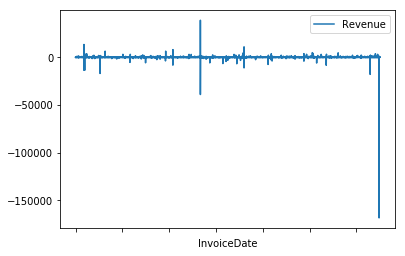

In [134]:
from pylab import *

sales.plot(x="InvoiceDate", y="Revenue", kind="line")

### Como existem dados negativos, vamos eliminar os valores menores que 0 

In [135]:
cancels = sales[sales["Revenue"]<0]
cancels.shape

(5588, 9)

In [136]:
sales.drop(sales[sales.Revenue < 0].index, inplace=True)
sales.shape

(319557, 9)

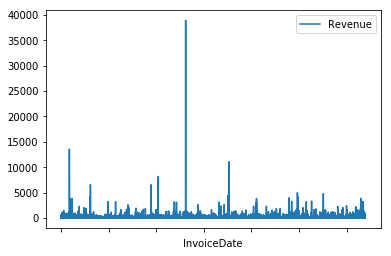

In [138]:
sales.plot(x="InvoiceDate", y="Revenue", kind="line")

### Groupby

### Encontrando o total do 'Revenue' por país agrupando a coluna 'Country' pelo 'Revenue'

In [139]:
CountryGroups = sales.groupby("Country")["Revenue"].sum().reset_index()

In [140]:
CountryGroups.sort_values(by= "Revenue", ascending=False)

,Country,Revenue
36,United Kingdom,5311080.101
10,EIRE,176304.590
24,Netherlands,165582.790
14,Germany,138778.440
13,France,127193.680
0,Australia,79197.590
31,Spain,36116.710
33,Switzerland,34315.240
3,Belgium,24014.970
25,Norway,23182.220


### Plotando um histograma do consumo ou 'revenue' para um cliente

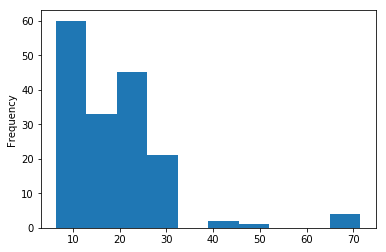

In [141]:
sales[sales["CustomerID"] == 17850.0]["Revenue"].plot(kind="hist")

### Plotando um histograma da quantidade vendida de um produto

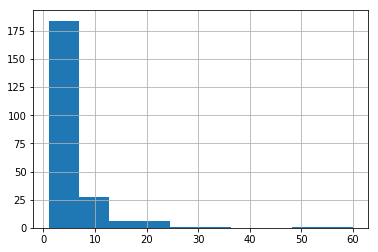

In [192]:
sales[sales["StockCode"] == '71053']["Quantity"].hist()

###  Identificando e tratando os valores nulos

In [177]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319557 entries, 0 to 325144
Data columns (total 9 columns):
InvoiceNo      319557 non-null object
StockCode      319557 non-null object
Description    318687 non-null object
Quantity       319557 non-null int64
InvoiceDate    319557 non-null object
UnitPrice      319557 non-null float64
CustomerID     238801 non-null float64
Country        319557 non-null object
Revenue        319557 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 24.4+ MB


In [203]:
sales.CustomerID.value_counts(dropna=False).nlargest(3)

NaN         80756
 17841.0     4702
 14911.0     3449
Name: CustomerID, dtype: int64

### Foram identificados 80756 valores NaN em 'CustomerID', vamos preencher com 0

In [205]:
sales.CustomerID.fillna(0, inplace=True)

In [206]:
sales[sales.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [207]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319557 entries, 0 to 325144
Data columns (total 9 columns):
InvoiceNo      319557 non-null object
StockCode      319557 non-null object
Description    318687 non-null object
Quantity       319557 non-null int64
InvoiceDate    319557 non-null object
UnitPrice      319557 non-null float64
CustomerID     319557 non-null float64
Country        319557 non-null object
Revenue        319557 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 34.4+ MB


### Substituindo os nomes dos países por números

In [223]:
mymap = {'United Kingdom':1, 'Netherlands':2, 'Germany':3, 'France':4, 'USA':5}       

sales = sales.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [224]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,1,20.34
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,1,20.34
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,1,15.30
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,1,11.10


In [231]:
sales.Country.value_counts().nlargest(7)

1          292640
3            5466
4            5026
EIRE         4789
Spain        1420
2            1393
Belgium      1191
Name: Country, dtype: int64